In [1]:
from callsetmerger.callsetmerger import Readers
from callsetmerger.recordcluster import convert_type_to_idx
import itertools
import pandas as pd
import upsetplot
import matplotlib.pyplot as plt

In [4]:
# Creating a multi index for the Series data structure used by upset plot
idx=pd.MultiIndex.from_tuples(
    list(itertools.product([True,False],
                           repeat=len(convert_type_to_idx.keys()))),
    names=[i.name for i in convert_type_to_idx.keys()])
upset_data = pd.Series(index=idx).fillna(0)
readers = Readers('/home/nmmsv/workspace/analysis/callset_merging/input/advntr.chr21.sorted.vcf.gz,/home/nmmsv/workspace/analysis/callset_merging/input/hipstr.chr21.sorted.vcf.gz,/home/nmmsv/workspace/analysis/callset_merging/input/gangstr.chr21.sorted.vcf.gz,/home/nmmsv/workspace/analysis/callset_merging/input/eh.chr21.sorted.vcf.gz'.split(","))
while not readers.done:
    # Get mergeable calls
    rc_list = readers.getMergableCalls()
    for rc in rc_list:
        upset_data[rc.GetVcfTypesTuple()] += 1
        pass
    # Move on
    readers.goToNext()

<ipython-input-4-76d144ccc3fc>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  upset_data = pd.Series(index=idx).fillna(0)


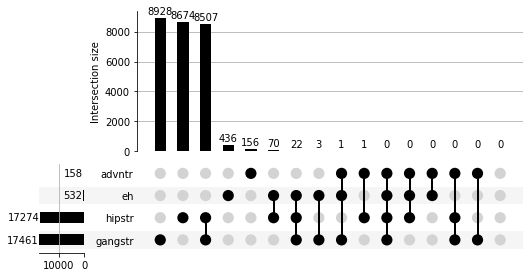

In [5]:
plt.style.use({'figure.facecolor':'white'})
upsetplot.plot(upset_data, show_counts='%d', sort_by='cardinality')
plt.show()
